In [4]:
import numpy as np
x=np.array([[1,2,3],[7,8,9]])
# y=np.array([4,5,6])
z=np.random.rand(3,3)




In [22]:
z

array([[0.95033896, 0.94161237, 0.9060576 ],
       [0.45610546, 0.20905835, 0.97592144],
       [0.37951391, 0.70612404, 0.13154874]])

In [ ]:
pstart=np.zeros((L*PE))
pstart=np.zeros((L*PE))

pstart[:-1]=pstart_in
pend[:-1]=pend_in


pstart_out=pstart[1:]
pend_out=pend[1:]

return rhs,

In [36]:
def add(x,y,d=None):
    z=x+y
    h=x*y+y
    if(x>20):
        print(d)
    return z,h

In [42]:
s,_=add(23,3,54)

54


In [38]:
s

5

In [24]:
z[:-1]=x

In [27]:
z

array([[1.        , 2.        , 3.        ],
       [7.        , 8.        , 9.        ],
       [0.37951391, 0.70612404, 0.13154874]])

In [28]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [26]:
z[1:]

array([[7.        , 8.        , 9.        ],
       [0.37951391, 0.70612404, 0.13154874]])

In [27]:
np.stack((np.array([1,2,3]),np.array([1,2,5])))

array([[1, 2, 3],
       [1, 2, 5]])

In [6]:
lk=[]
lk.append(np.array([1,2,3]))
lk.append(np.array([1,2.,5]))
np.stack(lk)

array([[1., 2., 3.],
       [1., 2., 5.]])

In [4]:
for i in range(3):
    l=i
    print(i)

0
1
2


In [23]:
x=np.zeros((2,3))
x[:,0:1]=np.ones((2,1))
x

array([[1., 0., 0.],
       [1., 0., 0.]])

In [1]:
import delay_file

In [3]:
x=0
for i in range(10000):
    x+=delay_file.delay_()
print(x/10000)

0.8879


In [8]:
delay_file.delay_()

1.0

In [1]:
def cd2u1(u,cx,dx,nx,Eqflag,Syncflag,L=None,PE=None,perPE=None,pstart_in=None,pend_in=None):
    '''For a given time step t to t+delt'''
#     u,du,C all take 1-D
    rhs=np.zeros_like(u)
    C=np.zeros_like(u)
    '''Concentration array'''
    if(Eqflag=='DBurgers'):
        C=u
    if((Eqflag=='DAdvection') or (Eqflag=='DAD')):
        for i in range(nx):
            C[i]=cx

    if(Syncflag=='DSync'):
        rhs[0] = -C[0]*(u[1] - u[nx-2])/(2*dx)
        rhs[nx-1] = -C[nx-1]*(u[1] - u[nx-2])/(2*dx)
        for i in range(1,nx-1):
            rhs[i] = -C[i]*(u[i+1] - u[i-1])/(2*dx)
        return rhs
            
    elif(Syncflag=='DAsync'):
        ## Interior point computations ##
        for pe in range(PE):       
            for i in range(pe*perPE+1,perPE*(pe+1)-1):
                du[i] = -C[i]*(u[i+1] - u[i-1])/(2*dx)
                
        ## Assigning values to buffer array ##
        #L=max_delay
        pstart=np.zeros((L*PE))
        pstart=np.zeros((L*PE))

        pstart[:-1]=pstart_in
        pend[:-1]=pend_in

        for pe in range(PE-1):
            pstart[L-1][pe+1]=u[(pe+1)*perPE]
            pend[L-1][pe]=u[(pe+1)*perPE-1]
        #Periodic Boundary points
        pstart[L-1][0]=u[0*perPE +1]
        pend[L-1][PE-1]=u[(PE)*perPE-1-1]
        
#         pstart[L-1],pend[L-1]=prob_1D_from_u_1D(u,PE,perPE)
        
        ## pend with left_pt    &   pstart with right_pt ##
        #Different l use        
        l=delay_file.delay_()
        du[0] = -C[0]*(u[1] - pend[l][PE-1])/(2*dx)
        l=delay_file.delay_()
        du[nx-1] = -C[nx-1]*(pstart[l][0*PE]- u[nx-2])/(2*dx)
        #Processor Boundary points
        for pe in range(PE-1):
            right_pt = perPE*(pe+1)-1
            l=delay_file.delay_()
            du[right_pt] = -C[right_pt]*(pstart[l][(right_pt+1)//perPE] - u[right_pt-1])/(2*dx)
            l=delay_file.delay_()
            left_pt = perPE*(pe+1)
            du[left_pt] = -C[left_pt]*(u[left_pt+1] - pend[l][(left_pt+1)//perPE - 1])/(2*dx)
        
        pstart_out=pstart[1:]
        pend_out=pend[1:]
        
        return rhs,pstart_out,pend_out

def euler(u,rhs,dt,nx):
#     v=np.zeros_like(u)
#     for i in range(nx):
#         v[i]=u[i]+dt*rhs[i]
    u=u+dt*rhs
    return u

In [16]:
u.shape

(256,)

In [20]:
u[64]

0.003925413946193551

In [21]:
a,b=prob_1D_from_u_1D(u,4,64)
a.shape

(4,)

In [22]:
a[0],b[1]=4,4

In [24]:
b

array([ 0.05298836,  4.        ,  0.05298836, -0.10192365])

In [2]:
import ic_file
import numpy as np
import matplotlib.pyplot as plt
import timestep_file
import FLAG_file
import grid_file
import input_file
import step

import delay_file

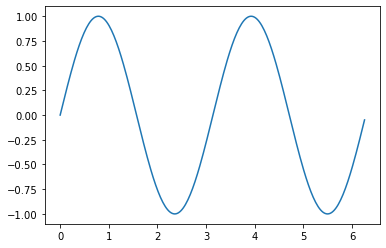

In [3]:
Length=2*np.pi
nx_=input_file.Nx
dx=Length/nx_
x_=grid_file.grid_(dx,nx_)
C=input_file.c
dt=timestep_file.timestep_(dx,cfl=input_file.cfl,EqFLAG=FLAG_file.EqnFLAG,cx=input_file.c)

init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                   num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
plt.plot(x_,init_c)
plt.show()


In [4]:
lis=[]
# Nt=input_file.N_t_
L=3
u=init_c
lis.append(u)
for k in range(L-2):
    rhs=cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag='DSync')
    u=step.euler(u,rhs,dt,nx_)
    lis.append(u)


In [5]:
def prob_1D_from_u_1D(u,PE,perPE):
    pstart=np.zeros(PE)
    pend=np.zeros(PE)
    for pe in range(PE-1):
        pstart[pe+1]=u[(pe+1)*perPE]
        pend[pe]=u[(pe+1)*perPE-1]
        #Periodic Boundary points
    pstart[0]=u[0*perPE +1]
    pend[PE-1]=u[(PE)*perPE-1-1]
    
    return pstart,pend

ps=[]
pe=[]
pst_1d,pen_1d=prob_1D_from_u_1D(init_c,4,64)
ps.append(pst_1d)
pe.append(pen_1d)
for h in range(L-2):
    pst_1d,pen_1d=prob_1D_from_u_1D(lis[h],4,64)
    ps.append(pst_1d)
    pe.append(pen_1d)

prob_Start=np.stack(ps)
prob_End=np.stack(pe)

In [25]:
l.shape

(2, 256)

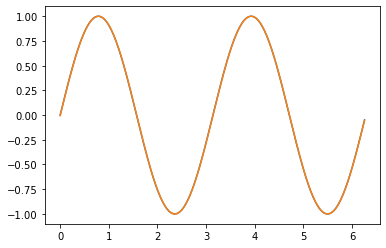

In [7]:
plt.plot(x_,l[0])
plt.plot(x_,l[1])


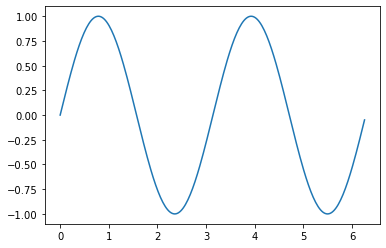

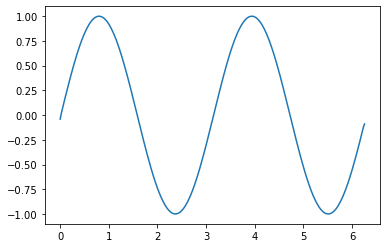

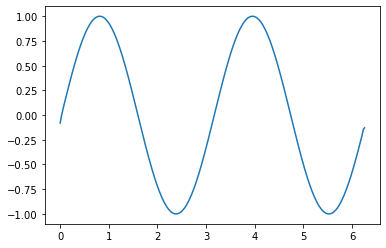

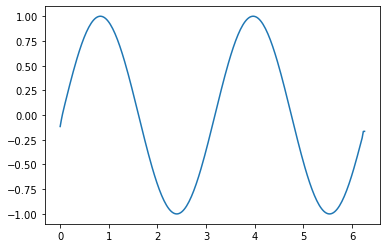

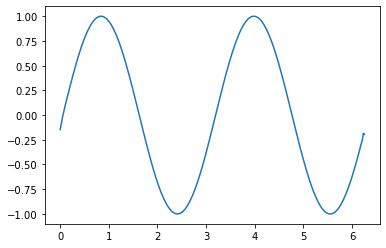

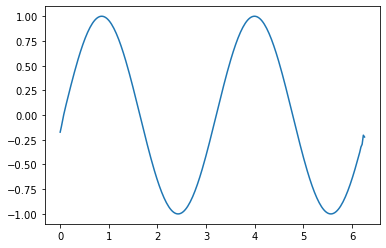

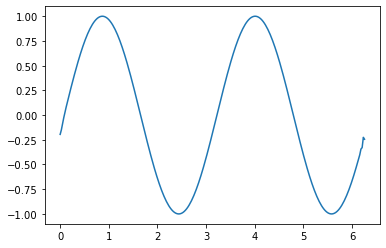

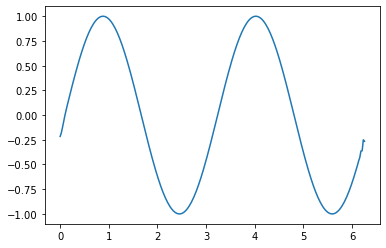

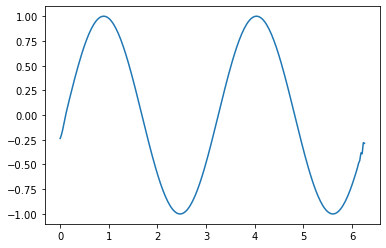

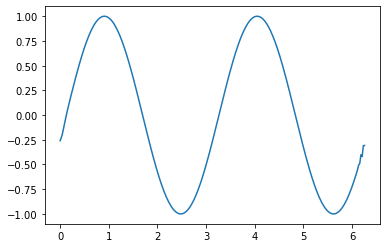

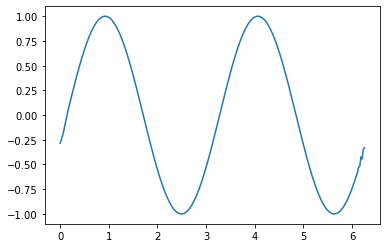

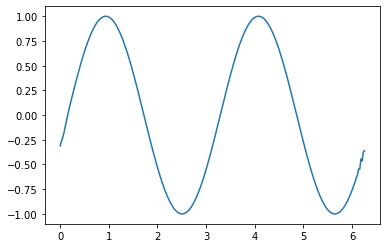

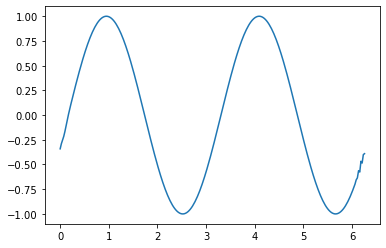

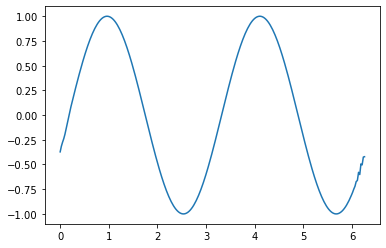

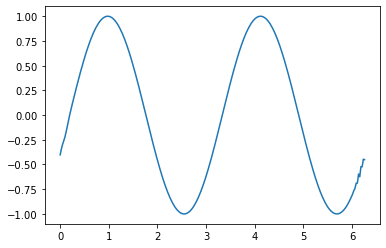

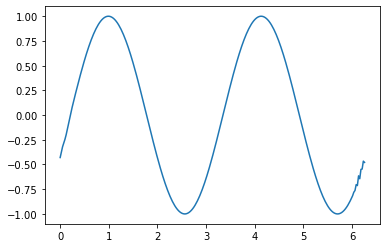

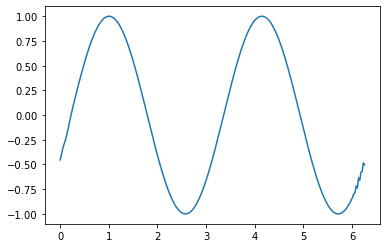

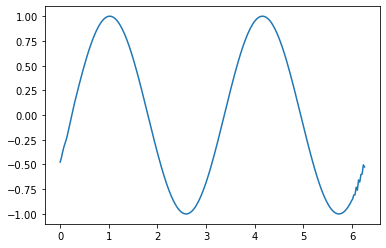

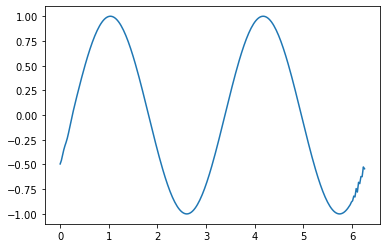

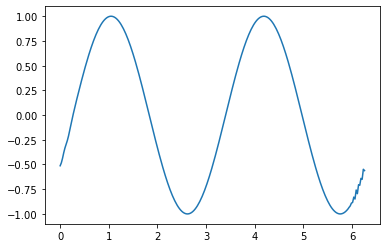

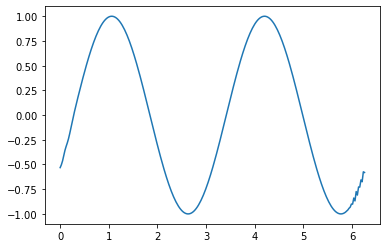

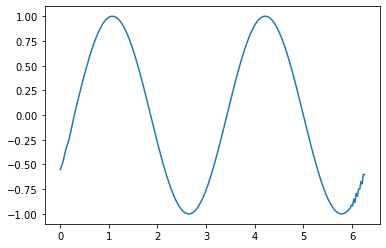

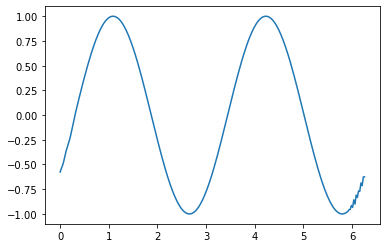

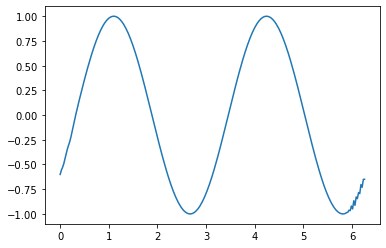

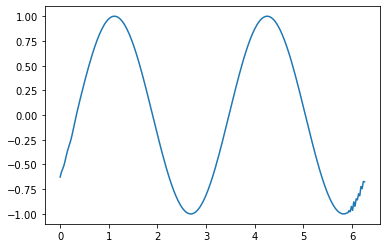

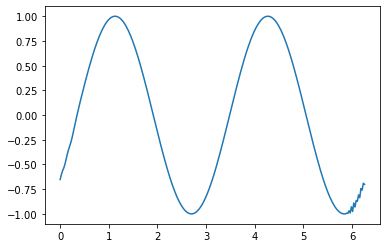

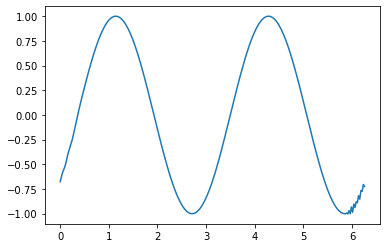

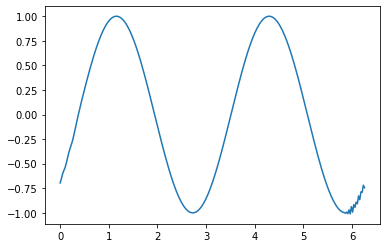

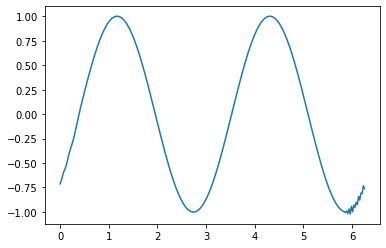

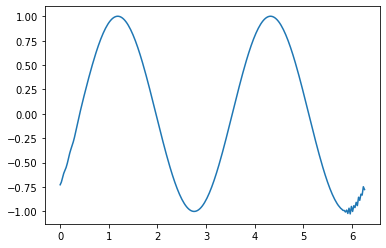

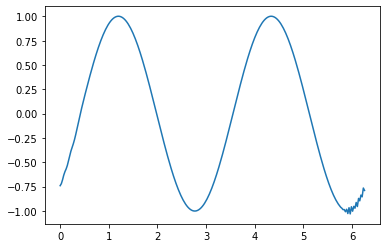

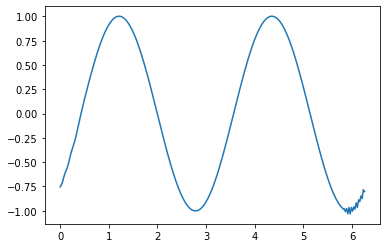

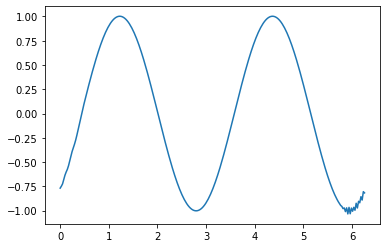

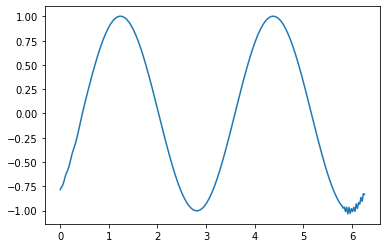

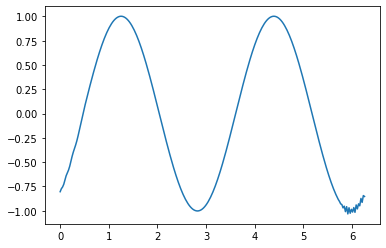

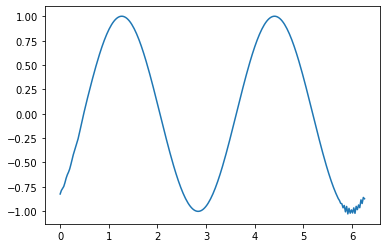

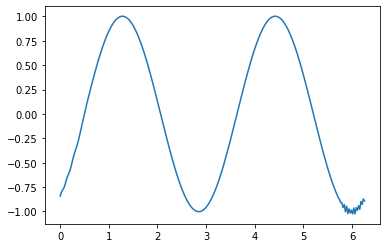

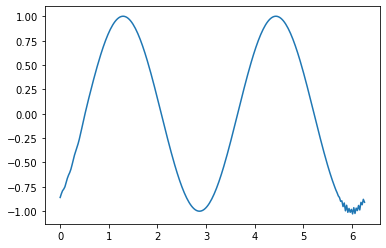

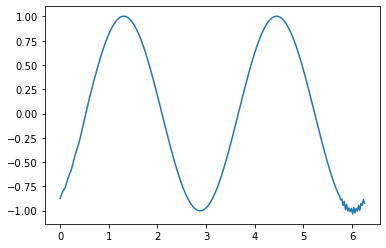

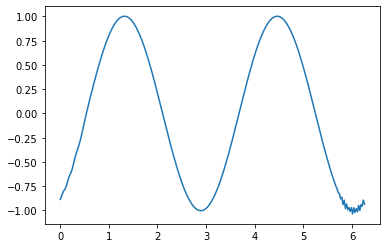

In [5]:

ls=[]
Nt=input_file.N_t_
u=init_c

l=3



In [ ]:
    
for j in range(Nt):
    rhs,prob_s,prob_e=cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag=FLAG_file.SyncFLAG)
    u=step.euler(u,rhs,dt,nx_)
    ls.append(u)
for i in range(40):
    plt.plot(x_,ls[i*7])

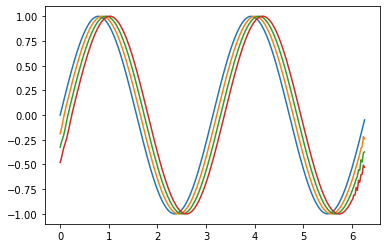

In [4]:
for i in range(4):
    plt.plot(x_,ls[i*40])
#     plt.show()

In [6]:
init_c

array([ 0.00000000e+00,  4.90676743e-02,  9.80171403e-02,  1.46730474e-01,
        1.95090322e-01,  2.42980180e-01,  2.90284677e-01,  3.36889853e-01,
        3.82683432e-01,  4.27555093e-01,  4.71396737e-01,  5.14102744e-01,
        5.55570233e-01,  5.95699304e-01,  6.34393284e-01,  6.71558955e-01,
        7.07106781e-01,  7.40951125e-01,  7.73010453e-01,  8.03207531e-01,
        8.31469612e-01,  8.57728610e-01,  8.81921264e-01,  9.03989293e-01,
        9.23879533e-01,  9.41544065e-01,  9.56940336e-01,  9.70031253e-01,
        9.80785280e-01,  9.89176510e-01,  9.95184727e-01,  9.98795456e-01,
        1.00000000e+00,  9.98795456e-01,  9.95184727e-01,  9.89176510e-01,
        9.80785280e-01,  9.70031253e-01,  9.56940336e-01,  9.41544065e-01,
        9.23879533e-01,  9.03989293e-01,  8.81921264e-01,  8.57728610e-01,
        8.31469612e-01,  8.03207531e-01,  7.73010453e-01,  7.40951125e-01,
        7.07106781e-01,  6.71558955e-01,  6.34393284e-01,  5.95699304e-01,
        5.55570233e-01,  

In [17]:
# FLAG_file.SyncFLAG

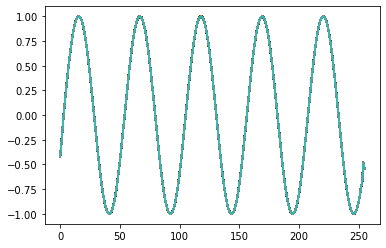

In [8]:
ls=np.array(ls)

In [9]:
ls.shape

(51, 256)

In [ ]:
cd2u1()

In [19]:
def cd2u1(double u[], double rhs[], double dx, int nx, 
           double cx, int sync, double *prob[], double **pstart[], 
           double **pend[], int PE, int perPE, int set, int nlevels, 
           int delay[], int tlevel[], long int bin[]):
    
    (u,C,cx,du,dx,nx,L,PE,perPE)
    '''For a given time step t to t+delt'''
{
	double *du, *C;
	allocate1D(du, nx);
	allocate1D(C, nx);
#     u,du,C all take 1-D
    du=np.zeros_like(u)
    C=np.zeros_like(u)
    '''Concentration array'''
    if(Eqflag=='DBurgers'):
        C=u
    if((Eqflag=='DAdvection') or (Eqflag=='DAD')):
        for i in range(nx):
            C[i]=cx

    if(Syncflag=='DSync'):
        du[0] = -C[0]*(u[1] - u[nx-1])/(2*dx)
        du[nx-1] = -C[nx-1]*(u[0] - u[nx-2])/(2*dx)
        for i in range(1,nx-1):
            du[i] = -C[i]*(u[i+1] - u[i-1])/(2*dx)
    elif(Syncflag=='DAsync'):
        ## Interior point computations ##
        for pe in range(PE):       
            for i in range(pe*perPE+1,perPE*(pe+1)-1):
                du[i] = -C[i]*(u[i+1] - u[i-1])/(2*dx)
        ## Assigning values to buffer array ##
        #pend=np.zeros(max_delay,PE)
        #pstart=np.zeros(max_delay,PE)
        for i in range(PE-1):
            pstart[max_delay-1][i+1]=u[(i+1)*perPE]
            pend[max_delay-1][i]=u[(i+1)*perPE-1]
        pstart[max_delay-1][0]=u[0*perPE]
        pend[max_delay-1][PE-1]=u[(PE)*perPE-1]
        #Different l use
        #Periodic Boundary points
        l=delay_file.delay_()
        du[0] = -C[0]*(u[1] - pend[l][(PE)*perPE-1])/(2*dx)
        l=delay_file.delay_()
        du[nx-1] = -C[nx-1]*(pstart[l][0*perPE]- u[nx-2])/(2*dx)
        #Processor Boundary points
        for pe in range(PE-1):
            right_pt = perPE*(pe+1)-1
            l=delay_file.delay_()
            du[right_pt] = -C[right_pt]*(pstart[(right_pt+1)/perPE][l][0] - u[right_pt-1])/(2*dx);
            l=delay_file.delay_()
            left_pt = perPE*(pe+1)
            du[left_pt] = -C[left_pt]*(u[left_pt+1] - pend[(left_pt+1)/perPE - 1][l][0])/(2*dx)
    
    return (u,C,cx,du,dx,nx,PE,perPE)
    
    
    {
			int right_pt;
			
			l = level(prob,set,nlevels,bin);
			k = nlevels-1-l;
			delay[2*pe+1] = l;
			tlevel[2*pe+1] = k;

			du[right_pt] = -C[right_pt]*(pstart[(right_pt+1)/perPE][l][0] - u[right_pt-1])/(2*dx);
#ifdef AT2
			du[right_pt] = -C[right_pt]*(at2u0((right_pt+1)/perPE,l,0,k,pstart) - u[right_pt-1])/(2*dx);
#endif
			int left_pt;
			left_pt = perPE*(pe+1);
			l = level(prob,set,nlevels,bin);
			k = nlevels-1-l;
			delay[2*(pe+1)] = l;
			tlevel[2*(pe+1)] = k;
			
			du[left_pt] = -C[left_pt]*(u[left_pt+1] - pend[(left_pt+1)/perPE - 1][l][0])/(2*dx);
#ifdef AT2
			du[left_pt] = -C[left_pt]*(u[left_pt+1] - at2u0((left_pt+1)/perPE-1,l,0,k,pend))/(2*dx);
#endif
		}

if(sync == 1){}
else
{
int l, k;
l = level(prob,set,nlevels,bin);
k =	nlevels-1-l;
delay[0] = l;
tlevel[0] = k;

		du[0] = -C[0]*(u[1] - pend[PE-1][l][0])/(2*dx);

    #ifdef AT2
		du[0] = -C[0]*(u[1] - at2u0(PE-1,l,0,k,pend))/(2*dx);
#endif

		for(int pe = 0; pe<PE-1; pe++)
		{
			int right_pt;
			right_pt = perPE*(pe+1)-1;
			l = level(prob,set,nlevels,bin);
			k = nlevels-1-l;
			delay[2*pe+1] = l;
			tlevel[2*pe+1] = k;

			du[right_pt] = -C[right_pt]*(pstart[(right_pt+1)/perPE][l][0] - u[right_pt-1])/(2*dx);
#ifdef AT2
			du[right_pt] = -C[right_pt]*(at2u0((right_pt+1)/perPE,l,0,k,pstart) - u[right_pt-1])/(2*dx);
#endif
			int left_pt;
			left_pt = perPE*(pe+1);
			l = level(prob,set,nlevels,bin);
			k = nlevels-1-l;
			delay[2*(pe+1)] = l;
			tlevel[2*(pe+1)] = k;
			
			du[left_pt] = -C[left_pt]*(u[left_pt+1] - pend[(left_pt+1)/perPE - 1][l][0])/(2*dx);
#ifdef AT2
			du[left_pt] = -C[left_pt]*(u[left_pt+1] - at2u0((left_pt+1)/perPE-1,l,0,k,pend))/(2*dx);
#endif
		}

		l = level(prob,set,nlevels,bin);
		k =	nlevels-1-l;
		delay[PE*2-1] = l;
		tlevel[PE*2-1] = k;
		du[nx-1] = -C[nx-1]*(pstart[0][l][0] - u[nx-2])/(2*dx);
#ifdef AT2
		du[nx-1] = -C[nx-1]*(at2u0(0,l,0,k,pstart) - u[nx-2])/(2*dx);
#endif
	}
	for(int i =0; i<nx; i++)
		rhs[i]+= du[i];
}


SyntaxError: invalid syntax (Temp/ipykernel_14512/1977755879.py, line 1)

In [1]:
from grid_file import*

In [2]:
x=grid_(0.2,256)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from ic_file import *

In [32]:
init_c=ic_(x,amp=np.arange(1,2),kappa=np.arange(1,2),phi=np.arange(1,2),num_k=1,num_phi=1,Nx=256)
plt.plot(np.arange(256),init_c)

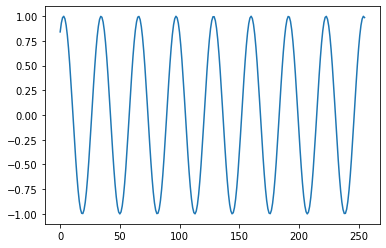

In [13]:
# number of grid points/ elements
Nx=256
# cfl number
cfl=0.08
# simulation end time
tend=0.5
# convective velocit(ies)
c=1.0
# diffusivity constant
eta=0.1
# number of wavenumbers
numk=3
# wavenumbers
k_ls=np.array([2,1,2])
# amplitudes
amp_ls=np.array([4,2,2])
# number of phase angles
numphi=1
# phase angles
phi_ls=np.array([0])
# number of PEs
numPE=4
# nlevels
nlevels=4
# number of sets
nsets=1
# probability for each set
prob_set=[0.3,0.5,0.2,0.0]


In [14]:
amp_ls*0.2

array([0.8, 0.4, 0.4])

In [3]:
# numphi
import input_file

In [4]:
np.arange(4)

NameError: name 'np' is not defined

In [9]:
import grid_file

In [10]:
import grid_file

In [13]:
type(grid_file.grid_(0.2,256))

numpy.ndarray

In [7]:
grid_file.grid_(0.2,256)

NameError: name 'grid_file' is not defined

In [15]:
import input_file

In [16]:
input_file.cfl

0.08

In [18]:
from input_file import *

In [20]:
numPE

4

In [ ]:
import numpy as np
def analytical_(x,amp,kappa,phi,num_k,num_phi,Nx,tend,cx,nu):
    u=np.zeros(Nx)
    for i in range(Nx):
        for k1 in range(num_k):
            for k2 in range(num_phi):
                u[i]+= amp[k1]*np.exp(-kappa[k1]*kappa[k1]*nu*tend)*np.sin(kappa[k1]*(x[i]-cx*tend)+phi[k2])
    return u

In [7]:
np.exp(1)*np.sin(1)

2.2873552871788423

In [3]:
4-5*2

-6

In [5]:
np.sin(1)

0.8414709848078965

In [3]:
# np.arange(4)

In [1]:
import analytical_file

In [6]:
import grid_file

In [7]:
x=grid_file.grid_(dx=0.2,nx=256)

In [9]:
analytical_file.analytical_(x,[1,2],[1,2],[1],2,1,256,12,0.1,0.2)

array([-0.01815636, -0.00011398,  0.01794639,  0.03530032,  0.05125012,
        0.06515356,  0.07645051,  0.08468616,  0.0895299 ,  0.09078879,
        0.08841529,  0.08250872,  0.07331052,  0.06119376,  0.04664717,
        0.03025484,  0.01267222, -0.00540026, -0.0232451 , -0.0401558 ,
       -0.05546429, -0.06856658, -0.07894583, -0.08619213, -0.09001819,
       -0.09027053, -0.08693582, -0.08014184, -0.07015326, -0.05736202,
       -0.04227276, -0.02548346, -0.00766223,  0.01047916,  0.02821387,
        0.04482951,  0.05965739,  0.07210021,  0.08165679,  0.08794288,
        0.09070701,  0.08984064,  0.08538221,  0.07751501,  0.06655901,
        0.05295706,  0.03725632,  0.02008565,  0.00213011, -0.0158965 ,
       -0.03327969, -0.04933218, -0.06342035, -0.0749885 , -0.08358012,
       -0.08885525, -0.09060373, -0.08875351, -0.08337387, -0.07467341,
       -0.06299265, -0.04879142, -0.03263151, -0.01515491,  0.00294141,
        0.0209333 ,  0.03809877,  0.05374747,  0.06724921,  0.07

In [13]:
# np.arange(25)

In [11]:
import matplotlib.pyplot as plt

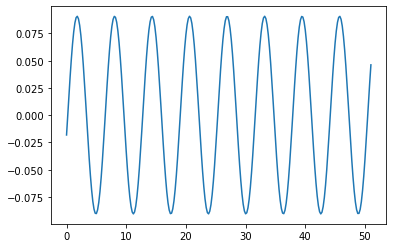

In [14]:
plt.plot(x,analytical_file.analytical_(x,[1,2],[1,2],[1],2,1,256,12,0.1,0.2))

In [1]:
import FLAG_file

In [2]:
FLAG_file.ATFLAG

'DAT2'

In [9]:
def timestep_(dx,cfl,cx,nu,EqFLAG):
    dt=0
    if EqFLAG == 'DAdvection':
        dt = cfl*dx/cx
    elif EqFLAG == 'DDiffusion':
        dt = cfl*dx*dx/nu
    elif ((EqFLAG == 'DAD') or (EqFLAG == 'DBurgers')):
        dt=min(cfl*dx/cx,cfl*dx*dx/nu)
    return dt

In [8]:
min(2*3,3*1)

3

In [6]:
if 2==2 or 3:
    print('yes')

yes


In [4]:
if 2>1 or 3>4:
    print('hrll')

hrll


In [5]:
# FLAGS used 

SyncFLAG = 'DSync'
#SyncFLAG ='DAsync'

####### equation type #############
EqnFLAG ='DAdvection'
EqnFLAG ='DDiffusion'
EqnFLAG = 'DAD'
EqnFLAG ='DBurgers'

###### Order of the CD scheme #####
CDFLAG =  'DCD2'
#CDFLAG=  'DCD4'

####### Time integration ##########
TimeFLAG = 'DEuler'
#TimeFLAG ='DRK2'

##### Order of the AT scheme ######
ATFLAG ='DAT2'

######## Printing data ############
#PrintFLAG ='DPrint_Domain'
#PrintFLAG ='DPrint_Initial_Solution'
#PrintFLAG ='DPrint_Analytical_Solution'
#PrintFLAG ='DPrint_All_u'
#PrintFLAG ='DPrint_Final_Solution'
#PrintFLAG ='DPrint_Error'
#PrintFLAG ='DPrint_Avg_Error'
